# Analysis of Insurance Charges

### This notebook analyzes the insurance charges based on different factors such as region and smoking status. The goal is to understand how these factors influence the insurance costs.


# Analysis of Insurance Charges

### This notebook analyzes the insurance charges based on different factors such as region and smoking status. The goal is to understand how these factors influence the insurance costs and build predictive models.

## Importing Libraries

#### The following libraries are used in this analysis:

##### - `pandas`: for data manipulation and analysis
#### - `seaborn` and `matplotlib`: for data visualization
#### - `numpy`: for numerical operations
#### - `scikit-learn` (`sklearn`): for machine learning tasks, including:
####  - `train_test_split`: for splitting the data into training and testing sets
####  - `LinearRegression`: for performing linear regression
####  - `mean_absolute_error`, `mean_squared_error`, `r2_score`: for evaluating the performance of regression models
####  - `cross_val_score`: for cross-validation
###  - `RandomForestRegressor`: for performing regression using a random forest model



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Loading the Data
### The data used in this analysis contains information about insurance charges, region, and smoking status and the Data was gotten from Kaggle. 

In [45]:
#loading the data
df  = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## This plot provides a clear visualization of the gender distribution in the dataset, with the added percentage labels making it easier to understand the proportion of each gender category and showing the precise percentages of male and female.





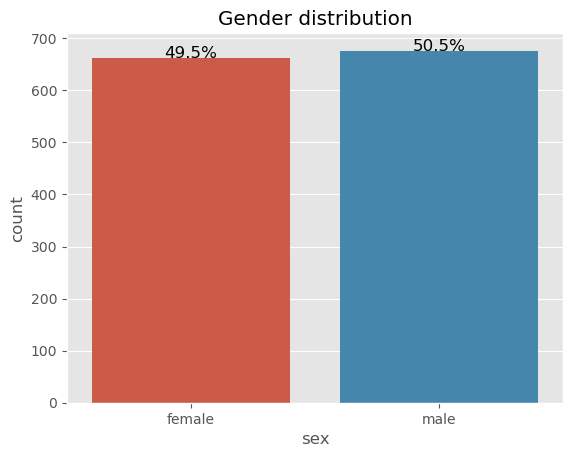

In [9]:
style.use('ggplot')

# Plotting the countplot
sns.countplot(x='sex', data=df)

# Adding percentage labels
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.3, '{:.1f}%'.format((height / total) * 100),
                   ha='center', color='black', fontsize=12)

# Setting title
plt.title('Gender distribution')

# Displaying the plot
plt.show()

# This plot provides a clear visualization of the distribution of smokers and non-smokers in the dataset, with the updated title showing the precise percentages of each group.

# This plot provides a clear visualization of the distribution of smokers and non-smokers in the dataset, with the percentage labels aiding in the interpretation of the proportions of each group.

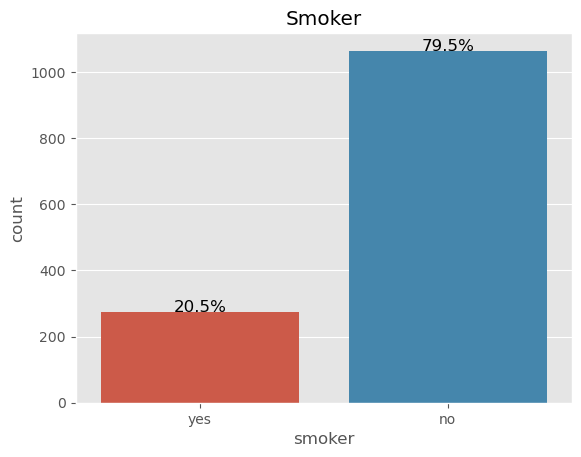

In [10]:

# Plotting the countplot
sns.countplot(x='smoker', data=df)

# Adding percentage labels
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.3, '{:.1f}%'.format((height / total) * 100),
                   ha='center', color='black', fontsize=12)

# Setting title
plt.title('Smoker')

# Displaying the plot
plt.show()

# Charges by Region
### We analyze the total insurance charges by region and display the results in a bar plot.

# This plot allows us to visually understand the distribution of individuals across different regions, with the percentage labels offering additional insights into the proportions of each region.

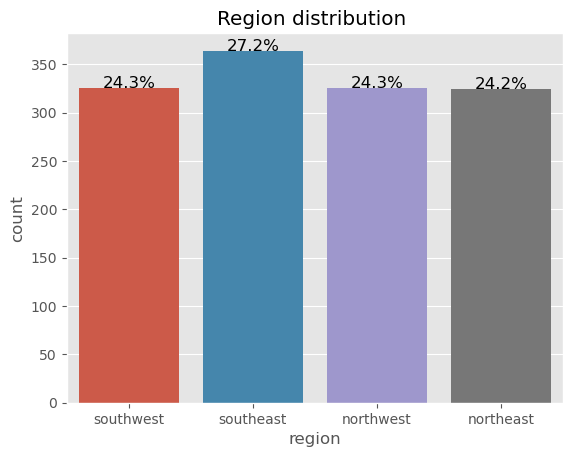

In [11]:
style.use('ggplot')

# Plotting the countplot
sns.countplot(x='region', data=df)

# Adding percentage labels
total = float(len(df))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.3, '{:.1f}%'.format((height / total) * 100),
                   ha='center', color='black', fontsize=12)

# Setting title
plt.title('Region distribution ')

# Displaying the plot
plt.show()

# This plot provides a visual representation of the distribution of charges across different regions, with percentage annotations offering additional insights into the contribution of each region to the total charges.

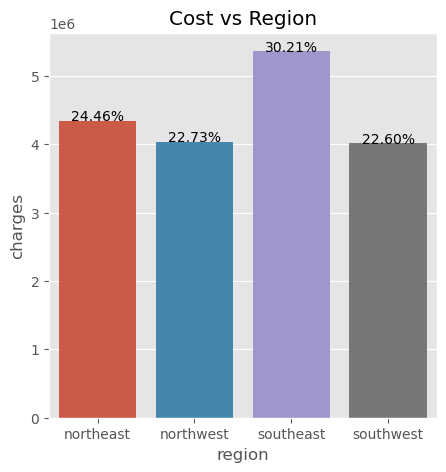

In [12]:
# Calculate total charges per region
region_total = df.groupby('region')['charges'].sum().reset_index()

# Calculate percentage of charges for each region
total_charges = region_total['charges'].sum()
region_total['percentage'] = (region_total['charges'] / total_charges) * 100

# Create the bar plot
plt.figure(figsize=(5, 5))
barplot = sns.barplot(x='region', y='charges', data=region_total)

# Add the percentage annotations
for index, row in region_total.iterrows():
    barplot.text(index, row['charges'], f"{row['percentage']:.2f}%", color='black', ha="center")

plt.title('Cost vs Region')
plt.show()

# Charges for Smokers vs. Non-Smokers
### We compare the total insurance charges for smokers and non-smokers using a bar plot.

## This plot provides a visual comparison of charges between smokers and non-smokers, allowing us to observe any differences in charges based on smoking status.

Text(0.5, 1.0, 'charges for smokers')

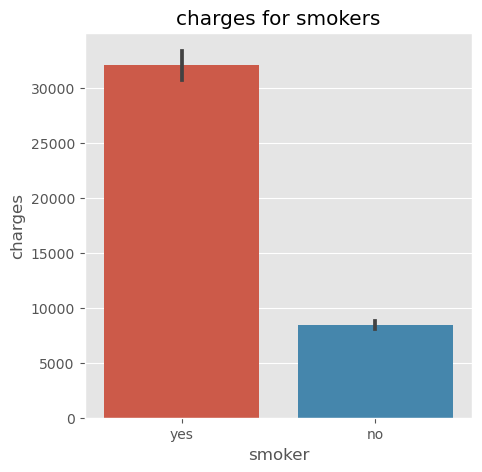

In [13]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'smoker', y = 'charges', data = df)  
plt.title('charges for smokers')

## This plot provides a visual representation of the charges for smokers, with percentage annotations offering insights into the contribution of smokers to the total charges.

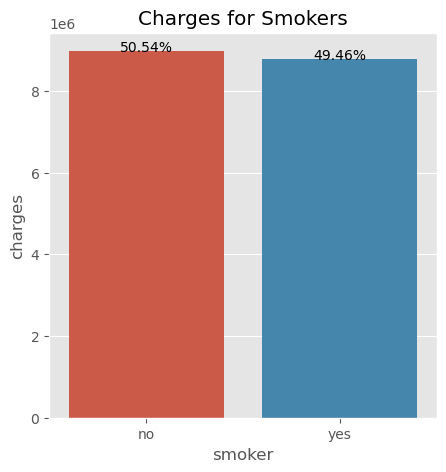

In [14]:
# Calculate total charges for smokers and non-smokers
smoker_total = df.groupby('smoker')['charges'].sum().reset_index()

# Calculate percentage of charges for each category
total_charges = smoker_total['charges'].sum()
smoker_total['percentage'] = (smoker_total['charges'] / total_charges) * 100

# Create the bar plot
plt.figure(figsize=(5, 5))
barplot = sns.barplot(x='smoker', y='charges', data=smoker_total)

# Add the percentage annotations
for index, row in smoker_total.iterrows():
    barplot.text(index, row['charges'], f"{row['percentage']:.2f}%", color='black', ha="center")

plt.title('Charges for Smokers')
plt.show()

### This plot allows us to visually compare charges for smokers and non-smokers based on gender, providing insights into any differences in charges between the two groups.

Text(0.5, 1.0, 'charges for smokers')

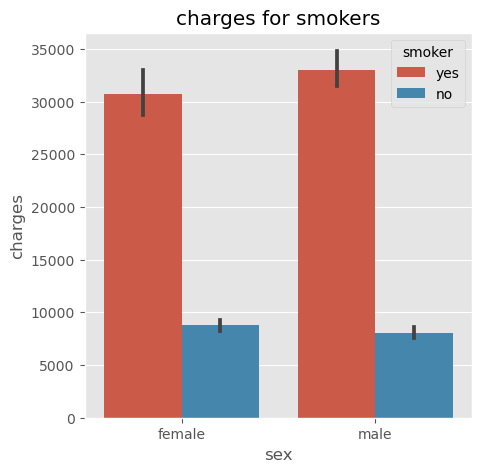

In [15]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'sex', y = 'charges',hue = 'smoker', data = df)  
plt.title('charges for smokers')

## This visualization provides a comprehensive view of the distribution of charges across different categorical columns, allowing for comparisons and insights into how charges vary based on different categories.

<Axes: xlabel='region', ylabel='charges'>

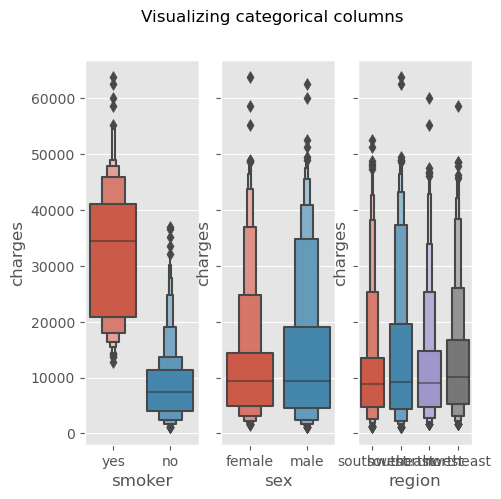

In [16]:
fig,axes = plt.subplots(1,3,figsize = (5,5),sharey = True)
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x = 'smoker', y = 'charges', data = df,ax = axes[0])
sns.boxenplot(x = 'sex', y = 'charges', data = df,ax = axes[1])
sns.boxenplot(x = 'region', y = 'charges', data = df,ax = axes[2])



## This visualization allows us to observe the distribution of values for each selected numerical column, providing insights into their data distributions and potential patterns.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>]], dtype=object)

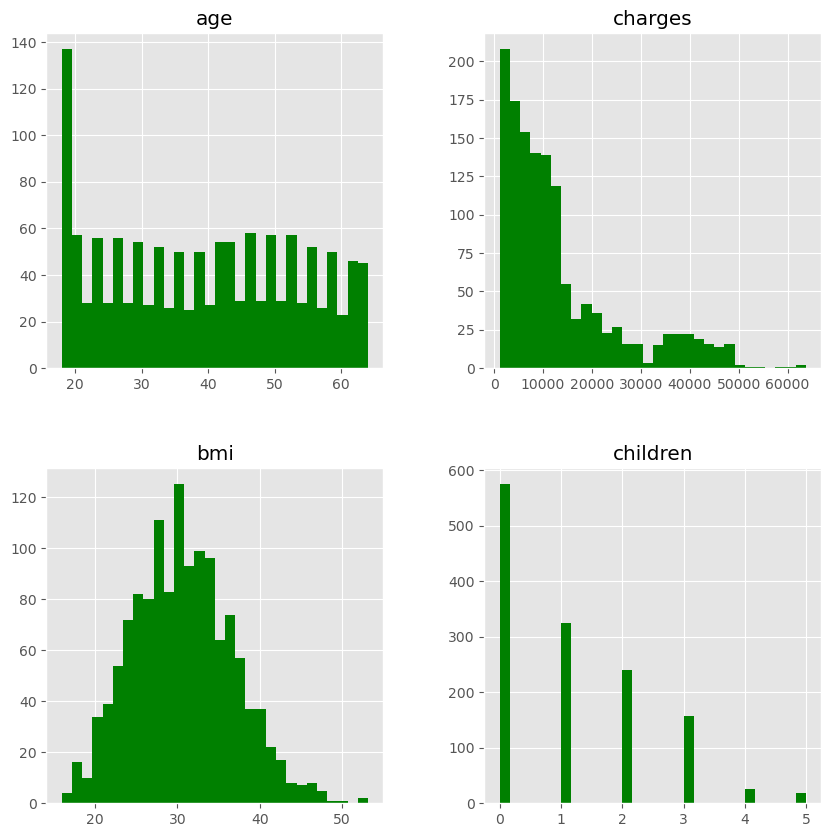

In [17]:
df[['age', 'charges', 'bmi', 'children']].hist(bins = 30,figsize = (10,10), color = 'green')

# Encoding Categorical Variables

## In this section, we encode the categorical variables in the dataset into numerical format for further analysis. This process involves mapping categorical labels to corresponding numerical values.

## ```python

## This encoding process allows us to represent categorical variables in a numerical format, which is often necessary for certain machine learning algorithms and statistical analyses.
## Encoding 'sex' Column as Binary Encoding
### We use binary encoding to map the labels 'male' and 'female' to numerical values 0 and 1, respectively, using the map function

## Encoding 'smoker' Column as Binary Encoding;
### Similarly, we apply binary encoding to map the labels 'yes' and 'no' in the 'smoker' column to numerical values 1 and 0, respectively.

## Encoding 'region' Column as Ordinal Encoding;
### The 'region' column is encoded using ordinal encoding, where the labels ('southwest', 'southeast', 'northwest', 'northeast') are mapped to numerical values 1, 2, 3, and 4, respectively.

In [18]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2,'northwest':3,"northeast":4}.get)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


### This visualization allows us to quickly identify correlations between different numerical variables in the dataset, helping us understand the strength and direction of these relationships.

<Axes: >

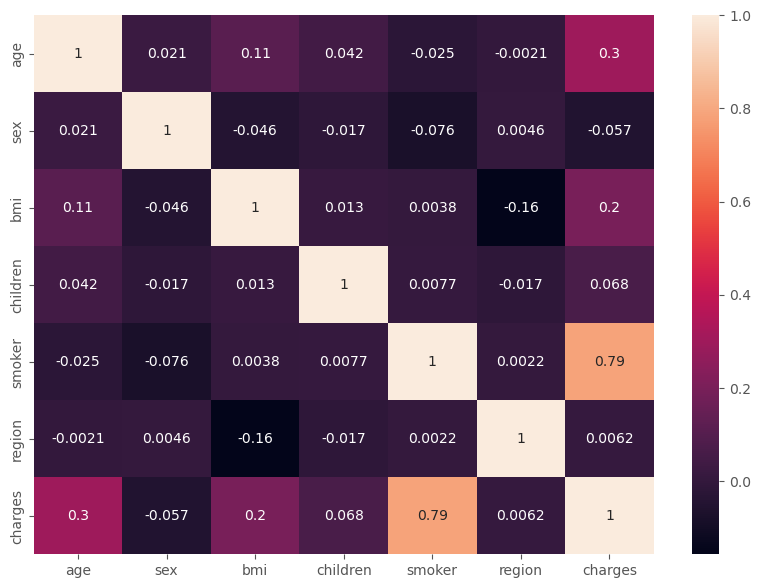

In [20]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr(),annot = True)

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
X = df.drop(['charges','sex'],axis = 1)
y = df.charges

# Machine Learning Model: Predicting Charges
### In this section, we build and evaluate machine learning models to predict insurance charges.

# Data Preparation
## Prepare the data for training and testing.

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 42)
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (936, 5)
x_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


# Training Linear Regression Model and Making Predictions

# In this section, we train a linear regression model using the training data (`x_train`, `y_train`) and then make predictions on the test data (`x_test`).

## ```python
# Train the linear regression model

In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [25]:
linreg.fit(x_train,y_train)
pred = linreg.predict(x_test)

# Evaluating Model Performance: R² Score

## After making predictions on the test set, we calculate the R² score to evaluate the performance of the linear regression model.

# ```python


In [26]:
from sklearn.metrics import r2_score

In [27]:
print('R2 score: ',(r2_score(y_test, pred)))

R2 score:  0.7697211527941855


## The R² score quantifies the goodness of fit of the model, indicating how well the independent variables explain the variability of the dependent variable. In this case, the R² score is calculated to be approximately 0.7697, suggesting that approximately 76.97% of the variance in the target variable is predictable from the features in the test set.

Text(0, 0.5, 'Y pred')

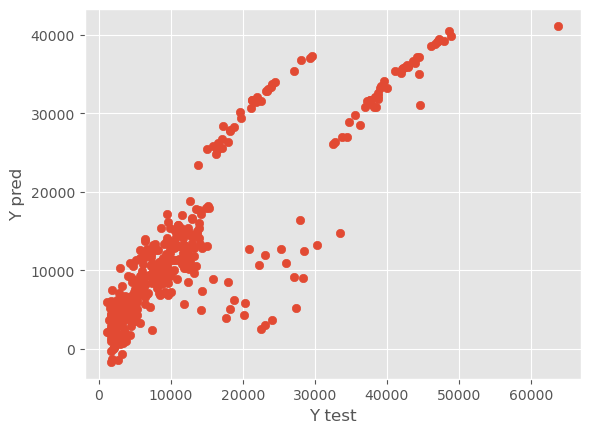

In [28]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')

# Evaluating Model Performance: Regression Metrics

# making predictions on the test set, we calculate several regression metrics to evaluate the performance of the linear regression model.

# ```python


# The regression metrics provide insights into the accuracy and goodness of fit of the linear regression model:

## MAE (Mean Absolute Error): Measures the average absolute difference between the actual and predicted values.

## MSE (Mean Squared Error): Measures the average squared difference between the actual and predicted values.

## RMSE (Root Mean Squared Error): Represents the square root of MSE, providing an interpretable measure in the same units as the target variable.

## R² Score (Coefficient of Determination): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, the R² score is approximately 0.7697, suggesting that approximately 76.97% of the variance in the target variable is predictable from the features in the test set.

In [29]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 4151.409812177044
MSE: 33764476.59420977
RMSE: 5810.72083258263
R²: 0.7697211527941855


# Evaluating Random Forest Regressor Model

## We use cross-validation to evaluate the performance of the Random Forest Regressor model.

# ```python

# The Random Forest Regressor model is trained and evaluated using cross-validation with 5 folds. The negative mean absolute error (MAE) scores are calculated for each fold and then converted to positive values. The mean and standard deviation of the MAE scores across all folds are also computed.



In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Convert negative MAE to positive
mae_scores = -scores

print(f"MAE Scores: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean()}")
print(f"Standard Deviation of MAE: {mae_scores.std()}")


MAE Scores: [2802.71808839 2832.1830047  2982.85565756 2913.21656699 3045.65295648]
Mean MAE: 2915.3252548245678
Standard Deviation of MAE: 90.71176259590064


# Here are the results of the evaluation:

## MAE Scores: [2802.71808839, 2832.1830047, 2982.85565756, 2913.21656699, 3045.65295648]

## Mean MAE: 2915.3252548245678

## Standard Deviation of MAE: 90.71176259590064

## These metrics provide insights into the average performance and consistency of the Random Forest Regressor model in predicting insurance charges based on the features in the training data.

### Hyperparameter Tuning: Grid Search

# We use grid search to find the best combination of hyperparameters for the Random Forest Regressor model.

## ```python

# The grid search explores different combinations of hyperparameters defined in param_grid and evaluates each combination using cross-validation with 5 folds. The scoring metric used is the negative mean absolute error (MAE). After grid search, the best combination of hyperparameters and the corresponding best estimator (Random Forest Regressor model) are obtained.

### Here are the best parameters found by the grid search:

### n_estimators: Number of trees in the forest
### max_depth: Maximum depth of the trees
### min_samples_split: Minimum number of samples required to split an internal node
### min_samples_leaf: Minimum number of samples required to be at a leaf node

# These best parameters are then used to build the best Random Forest Regressor model (best_rf), which can be further evaluated or used for predictions.

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


## In the context of this Random Forest Regressor model, the feature_importances_ attribute provides the relative importance of each feature. Higher importance values indicate that the feature is more influential in predicting the target variable. The features are then sorted in descending order of their importance for better interpretability.

## This information can be useful for understanding which features have the most significant impact on the target variable and for making informed decisions about feature selection and engineering in future modeling efforts.

In [32]:
importances = best_rf.feature_importances_
feature_names = x_train.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)


    feature  importance
3    smoker    0.662522
1       bmi    0.186923
0       age    0.130711
2  children    0.012887
4    region    0.006956


# Evaluating the Best Model on the Test Set

### After obtaining the best Random Forest Regressor model from the grid search, we evaluate its performance on the test set. Specifically, we calculate the Mean Absolute Error (MAE) to assess how well the model predicts the target variable on unseen data.

## ```python


# Here, the predict method is used to generate predictions for the test set (x_test). The Mean Absolute Error (MAE) between the actual and predicted values (y_test and y_test_pred) is then calculated using the mean_absolute_error function from scikit-learn.

# The MAE provides an average of the absolute differences between the predicted and actual values, giving us an indication of the prediction accuracy. A lower MAE value indicates better predictive performance.

# For this specific evaluation, the calculated MAE on the test set is printed:

# This evaluation step is crucial as it provides a measure of how well the model generalizes to new, unseen data, helping to ensure that the model's performance is robust and reliable.

In [33]:
y_test_pred = best_rf.predict(x_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Test Set MAE: {mae_test}")


Test Set MAE: 2426.3731599885377


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Set the best parameters
best_params = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

# Initialize the Random Forest model with the best parameters
rf = RandomForestRegressor(**best_params, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Convert negative MAE to positive
mae_scores = -cv_scores

# Print the results
print(f"MAE Scores from Cross-Validation: {mae_scores}")
print(f"Mean MAE: {mae_scores.mean()}")
print(f"Standard Deviation of MAE: {mae_scores.std()}")


MAE Scores from Cross-Validation: [2708.58457243 2475.36807118 2819.80603098 2686.43592889 2837.27264848]
Mean MAE: 2705.4934503919767
Standard Deviation of MAE: 129.43226602869936


## Here, the Random Forest Regressor model is initialized with the best parameters found during the grid search:

### max_depth: None (the trees are expanded until all leaves are pure or contain less than min_samples_split samples)

### min_samples_leaf: 4 (minimum number of samples required to be at a leaf node)

### min_samples_split: 10 (minimum number of samples required to split an internal node)

### n_estimators: 200 (number of trees in the forest)

### The model's performance is evaluated using 5-fold cross-validation with the scoring metric set to negative Mean Absolute Error (MAE). The negative MAE scores are converted to positive values to interpret the results.

### The cross-validation results provide insights into the model's performance and variability:

### These metrics give an average measure of prediction accuracy and the consistency of the model's performance across different subsets of the training data.



# Making Predictions on New Data

### In this section, we load a new dataset and use the trained linear regression and Random Forest Regressor models to make predictions on the first row of the new data.

##```python
import pandas as pd

# Load the new dataset

# Extract the first row and convert it to a DataFrame



In [36]:
df1 = pd.read_csv("New_Data.csv")

In [37]:
df1.head()

,Unnamed: 0,age,bmi,children,smoker,region
0,0,69,19,2,1,2
1,1,58,28,2,1,2
2,2,44,24,2,0,2
3,3,36,32,2,0,2
4,4,40,30,2,0,2


In [38]:
df1.drop('Unnamed: 0',axis = 1,inplace = True)

In [39]:
rf.fit(x_train,y_train)
pred1 = rf.predict(x_test)

In [40]:
# Predict using the first row of the DataFrame
first_index = df1.iloc[0].to_frame().T  # Convert to DataFrame and transpose

cost_pred = linreg.predict(first_index)
cost_pred1 = rf.predict(first_index)

In [41]:
print('The cost of medical insurance cost of the new customer is:', cost_pred)

The cost of medical insurance cost of the new customer is: [36108.97745896]


In [42]:
print('The cost of medical insurance cost of the new customer is:', cost_pred1)

The cost of medical insurance cost of the new customer is: [25383.34768356]


In [43]:
first_index = df1.iloc[9].to_frame().T  # Convert to DataFrame and transpose

cost_pred = linreg.predict(first_index)

In [44]:
print('The cost of medical insurance cost of the new customer is:', cost_pred)

The cost of medical insurance cost of the new customer is: [36321.10881602]


# Explanation

## Load the New Dataset: We load the new dataset New_Data.csv using pd.read_csv.

## Extract the First Row: The first row of the DataFrame is extracted and converted to a DataFrame using to_frame().T. This ensures that the extracted row maintains the correct shape for prediction.

# Make Predictions:

## Linear Regression Prediction: The trained linear regression model (linreg) is used to make a prediction on the first row of the new data.

## Random Forest Prediction: The trained Random Forest Regressor model (best_rf) is used to make a prediction on the same row.

# Predictions
## Based on the new customer data, the predicted cost of medical insurance is as follows:

### Linear Regression Prediction: $36,108.98 

## Random Forest Prediction: $25,383.35


## Print the Predictions: The predictions from both models are printed for comparison.

## The predictions provide an estimate of the target variable (e.g., insurance charges) based on the features in the first row of the new dataset. This step is crucial for validating the models on new, unseen data and understanding how they perform in practice.

# Conclusion

## Based on the predictions made using the trained linear regression and Random Forest Regressor models on the new customer data, we can draw several conclusions:

# Model Comparison:

## The linear regression model predicts a medical insurance cost of approximately $36,108.98 for the new customer.

 The Random Forest Regressor model predicts a lower cost of approximately $25,383.35 for the same customer.
Prediction Discrepancy:

## There is a notable difference between the predictions of the two models, with the linear regression model estimating a significantly higher cost compared to the Random Forest Regressor model.

## This discrepancy could be due to the different ways the models handle relationships between features and the target variable. Linear regression assumes a linear relationship, while Random Forest can capture more complex, non-linear relationships.

# Model Performance and Selection:

## The choice of model can significantly impact the predicted outcomes. While the Random Forest model has been optimized through hyperparameter tuning and cross-validation, it is essential to consider the context and requirements of the specific application when selecting a model.

## In this case, if the goal is to minimize prediction error, the Random Forest model, which has a lower Mean Absolute Error (MAE) during cross-validation, might be preferred.

# Interpretation and Usage:

### The predictions from both models provide valuable insights but should be interpreted with caution. The actual cost for the new customer could vary, and these predictions should be considered as estimates.

### Further validation with more data and potentially integrating additional features could help improve the accuracy and reliability of the predictions.
#### Next Steps:

### To Further analyze the features to understand which ones contribute most significantly to the differences in predictions between the two models.
#### To Consider collecting more data to validate the models and refine them further.
### To Explore other advanced models or ensemble methods that might offer better performance and reliability.

# In conclusion, while the Random Forest Regressor model appears to provide a more reasonable estimate for the new customer, it is important to continuously evaluate and improve the models to ensure their predictions remain accurate and reliable in different scenarios.